
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline


## The Data

**Download the fashion mnist dataset using Keras.**

**Let's first begin to import related libraries.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist  

In [3]:
mnist = fashion_mnist.load_data()  # Loading "fashion_mnist" data
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(mnist)

2

**Spliting mnist dataset into train and test sets.**

In [5]:
(X_train, y_train), (X_test, y_test) = mnist

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Visualizing the Data

**Using matplotlib let's discover the images from the data set.**

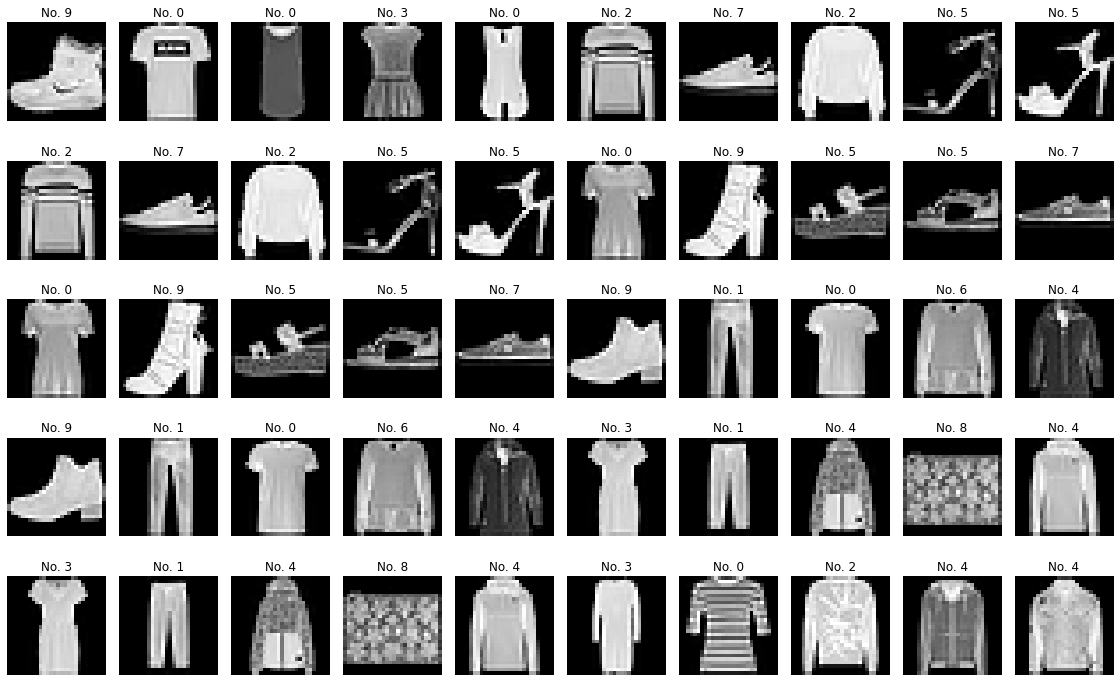

In [13]:
num_rows, num_cols = 5, 10

f, ax = plt.subplots(5, 10, figsize=(20, 12),
                     gridspec_kw={'wspace':0.03, 'hspace':0.4}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

**Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the fourth-sixth image in our dataset and check its size using the "shape" function.

In [14]:
y_train[42]

9

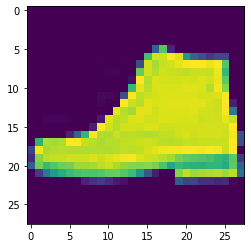

In [15]:
plt.imshow(X_train[42]);

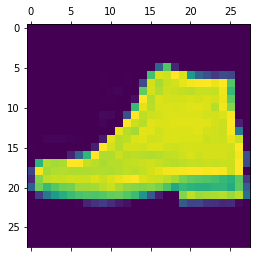

In [16]:
plt.matshow(X_train[42]);

In [17]:
# check image shape

X_train[42].shape

(28, 28)

**In fact, when we make a detailed examination it's obvious that the shape of every image in the mnist dataset is 28 x 28 by default, so we will not need to check the shape of all the images. When using real-world datasets, we may not be so lucky that we can find such a wonderful dataset. Moreover, 28 x 28 is so quite small size that the CNN algorithm can handle with each image pretty quickly.**

## Preprocessing the Data

**One of the step before going further is to normalize the X train and X test using max value of the image arrays.**

In [18]:
X_train[42].min()

0

In [19]:
X_test[42].max()

255

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
X_train[42].min()

0.0

In [22]:
X_train[42].max() # the max value after being normalized

1.0

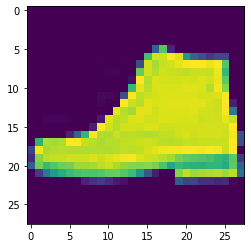

In [23]:
plt.imshow(X_train[42]);  # the image after being normalized

**Reshape the X into 4 dimension**

In [24]:
X_train.shape[0]

60000

**Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes up with the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.**

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape  # x train/test sets after being reshaped into 4 dimension

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Y_train = to_categorical(y_train, 10) 
# Y_test = to_categorical(y_test, 10)
# Y_test.shape

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
set(y_train)  # these are the classes of images where they belong to.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [32]:
set(y_test)  # these are the classes of images where they belong to.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

**We need to "one-hot-encode" our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 9. This means that the tenth number in our array will have a 1 and the rest of the array will be filled with 0.**

In [33]:
y_train.shape

(60000,)

In [34]:
Y_train = y_train.reshape(-1, 1)
Y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [35]:
OHE = OneHotEncoder(sparse=False)

Y_train = OHE.fit_transform(Y_train)
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
Y_train.shape

(60000, 10)

In [37]:
y_train[0]

9

In [38]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [39]:
y_test.shape

(10000,)

In [40]:
Y_test = y_test.reshape(-1, 1)
Y_test

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [41]:
Y_test = OHE.fit_transform(Y_test)
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [44]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))


# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(64, activation='relu'))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
# model = Sequential()

# model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))  
  
# model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1))) 

# model.add(Flatten()) 

# model.add(Dense(128, activation='relu'))  

# model.add(Dense(10, activation='softmax')) 

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy']
#              )

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2560064   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,561,354
Trainable params: 2,561,354
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [47]:
model.fit(X_train, Y_train, epochs=25, validation_data=(X_test, Y_test))

Epoch 1/25
1875/1875 [==============================] - 143s 76ms/step - loss: 0.3755 - accuracy: 0.8685 - val_loss: 0.3283 - val_accuracy: 0.8818
Epoch 2/25
1875/1875 [==============================] - 145s 77ms/step - loss: 0.2577 - accuracy: 0.9079 - val_loss: 0.2884 - val_accuracy: 0.8972
Epoch 3/25
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2188 - accuracy: 0.9221 - val_loss: 0.3013 - val_accuracy: 0.8977
Epoch 4/25
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1937 - accuracy: 0.9312 - val_loss: 0.2744 - val_accuracy: 0.9079
Epoch 5/25
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1743 - accuracy: 0.9382 - val_loss: 0.2668 - val_accuracy: 0.9086
Epoch 6/25
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1576 - accuracy: 0.9446 - val_loss: 0.2999 - val_accuracy: 0.9063
Epoch 7/25
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1454 - accuracy: 0.9490 - val_loss: 0

**Plot values of metrics you used in your model.**

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.history.history

{'loss': [0.37548431754112244,
  0.25771310925483704,
  0.2188255339860916,
  0.19366556406021118,
  0.17430302500724792,
  0.157617449760437,
  0.1454378366470337,
  0.13528232276439667,
  0.12341684848070145,
  0.11544178426265717,
  0.10748450458049774,
  0.09563135355710983,
  0.09081898629665375,
  0.08403418213129044,
  0.0791187584400177,
  0.07331907749176025,
  0.06812811642885208,
  0.06491037458181381,
  0.060920294374227524,
  0.058362364768981934,
  0.05400573089718819,
  0.05201709270477295,
  0.04718509688973427,
  0.04490479826927185,
  0.04286014288663864],
 'accuracy': [0.8685166835784912,
  0.9078999757766724,
  0.9220666885375977,
  0.9311500191688538,
  0.9382333159446716,
  0.944599986076355,
  0.9490000009536743,
  0.9532833099365234,
  0.9566500186920166,
  0.9599833488464355,
  0.963366687297821,
  0.9677333235740662,
  0.9687666893005371,
  0.9720166921615601,
  0.972683310508728,
  0.9750166535377502,
  0.9769166707992554,
  0.9785666465759277,
  0.9797833561

In [57]:
summary = pd.DataFrame(model.history.history)
summary.style.background_gradient(subset=['accuracy','val_accuracy'], cmap='RdPu')

,loss,accuracy,val_loss,val_accuracy
0,0.375484,0.868517,0.328305,0.881800
1,0.257713,0.907900,0.288409,0.897200
2,0.218826,0.922067,0.301304,0.897700
3,0.193666,0.931150,0.274429,0.907900
4,0.174303,0.938233,0.266758,0.908600
5,0.157617,0.944600,0.299855,0.906300
6,0.145438,0.949000,0.297377,0.906700
7,0.135282,0.953283,0.365464,0.907300
8,0.123417,0.956650,0.329470,0.913800
9,0.115442,0.959983,0.452842,0.899500


In [53]:
model_summary_mean = pd.DataFrame(summary.mean(), columns=["Model's Summary Mean"])
model_summary_mean

,Model's Summary Mean
loss,0.116836
accuracy,0.959531
val_loss,0.448234
val_accuracy,0.904884


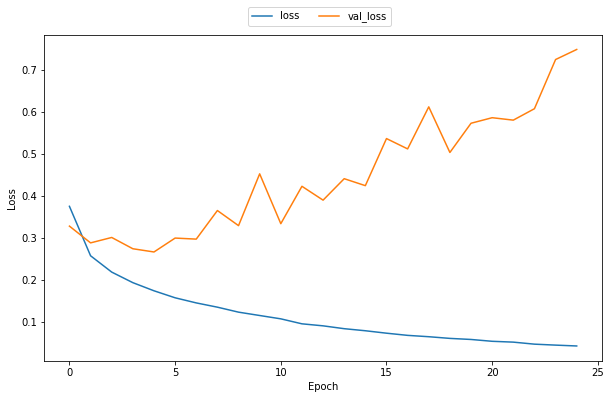

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor =(0.63, 1.10), ncol = 2);

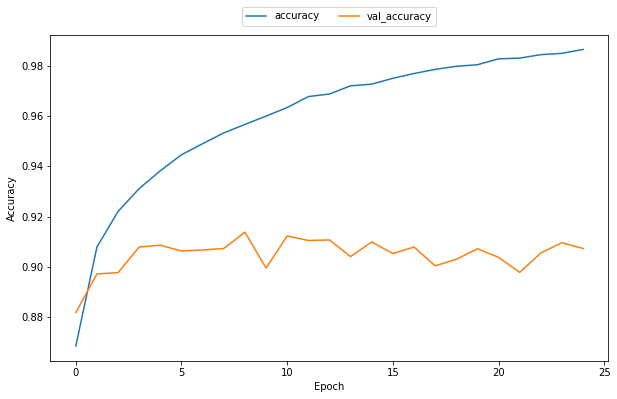

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor =(0.7, 1.10), ncol = 2);

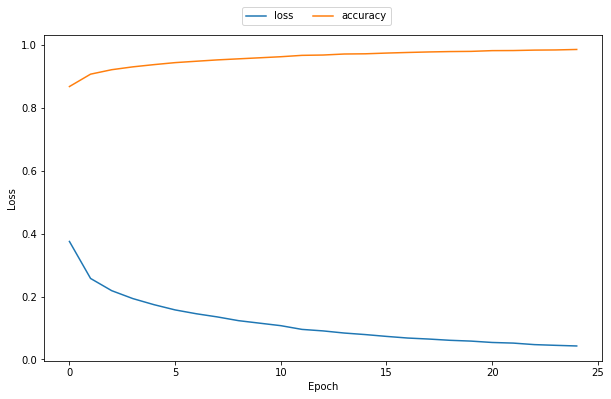

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.accuracy, label="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor =(0.63, 1.10), ncol = 2);

**Train the model using earlystop.**

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_accuracy', mode = "auto", verbose = 1, patience = 3)

In [60]:
model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.9214 - val_accuracy: 0.8797
Epoch 2/15
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.7230 - val_accuracy: 0.9068
Epoch 3/15
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.7538 - val_accuracy: 0.9068
Epoch 4/15
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.7547 - val_accuracy: 0.9037
Epoch 5/15
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.8161 - val_accuracy: 0.9041
Epoch 00005: early stopping


**Plot values of metrics you used in your model.**

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
model.history.history

{'loss': [0.03926368057727814,
  0.03867707774043083,
  0.03549766540527344,
  0.03662114590406418,
  0.03244299441576004],
 'accuracy': [0.9872833490371704,
  0.9874666929244995,
  0.9886833429336548,
  0.988349974155426,
  0.9896500110626221],
 'val_loss': [0.9214061498641968,
  0.7229599952697754,
  0.7538174390792847,
  0.7547405958175659,
  0.8161145448684692],
 'val_accuracy': [0.8797000050544739,
  0.9067999720573425,
  0.9067999720573425,
  0.9036999940872192,
  0.9041000008583069]}

In [63]:
summary = pd.DataFrame(model.history.history)

summary.style.background_gradient(subset=['accuracy','val_accuracy'], cmap='RdPu')

,loss,accuracy,val_loss,val_accuracy
0,0.039264,0.987283,0.921406,0.879700
1,0.038677,0.987467,0.722960,0.906800
2,0.035498,0.988683,0.753817,0.906800
3,0.036621,0.988350,0.754741,0.903700
4,0.032443,0.989650,0.816115,0.904100


In [64]:
model_summary_mean = pd.DataFrame(summary.mean(), columns=["Model's Summary Mean"])
model_summary_mean

,Model's Summary Mean
loss,0.036501
accuracy,0.988287
val_loss,0.793808
val_accuracy,0.900220


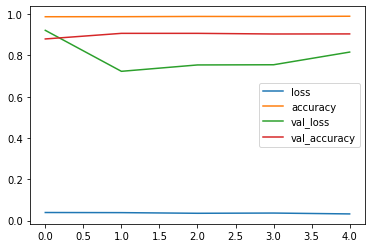

In [67]:
summary.plot();

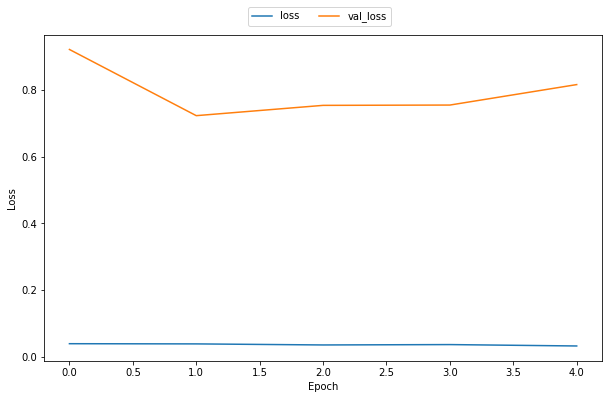

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor =(0.63, 1.10), ncol = 2);

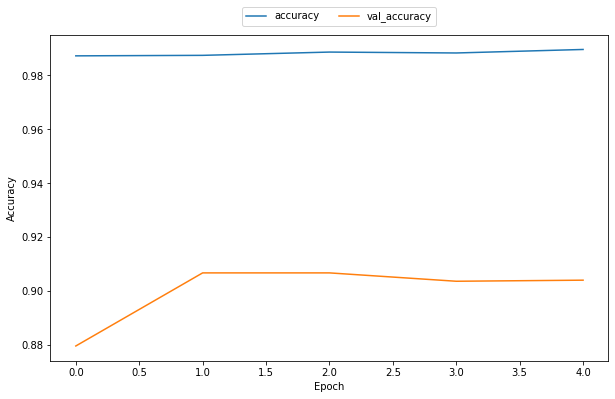

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor =(0.7, 1.10), ncol = 2);

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 4s 14ms/step - loss: 0.8161 - accuracy: 0.9041
[0.8161145448684692, 0.9041000008583069]


In [72]:
preds = model.predict(X_test)

In [73]:
preds[42]

array([1.8372187e-02, 7.2783486e-09, 3.8472410e-02, 2.2996410e-03,
       8.3986153e-05, 7.8692608e-09, 9.4077176e-01, 3.7262972e-13,
       6.2783001e-10, 2.5921283e-16], dtype=float32)

In [74]:
predictions = np.argmax(preds, axis=1)

In [75]:
predictions.shape

(10000,)

In [76]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [77]:
set(predictions)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [78]:
y_test.shape

(10000,)

**Let's examine the classification report.**

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.88      0.82      0.85      1000
           5       0.96      0.99      0.97      1000
           6       0.73      0.74      0.73      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



**Let's visualize the classification report by seaborn heatmap.**

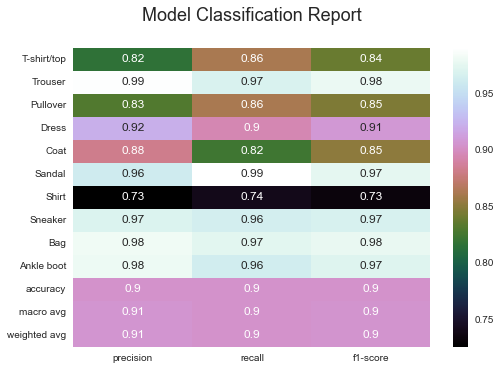

In [144]:
true = y_test
pred = predictions
labels = np.arange(10)
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

clf_report = classification_report(true,
                                   pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)

plt.title("Model Classification Report\n", fontsize =18)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="cubehelix");  # .iloc[:-1, :] to exclude support

**Let's examine the confusion matrix.**

In [80]:
print(confusion_matrix(y_test, predictions))

[[862   1  28  11   3   0  91   0   4   0]
 [  3 968   4  12   4   0   6   0   3   0]
 [ 24   0 862   5  34   1  72   1   1   0]
 [ 31   8   9 895  25   2  28   0   2   0]
 [  2   1  76  20 823   2  76   0   0   0]
 [  0   0   0   0   0 990   0   5   1   4]
 [131   0  53  26  42   0 741   0   7   0]
 [  0   0   0   0   0  20   0 964   0  16]
 [  3   1   6   2   2   6   5   1 973   1]
 [  0   0   0   0   0  10   2  24   1 963]]


**Let's visualize the confusion matrix by seaborn heatmap.**

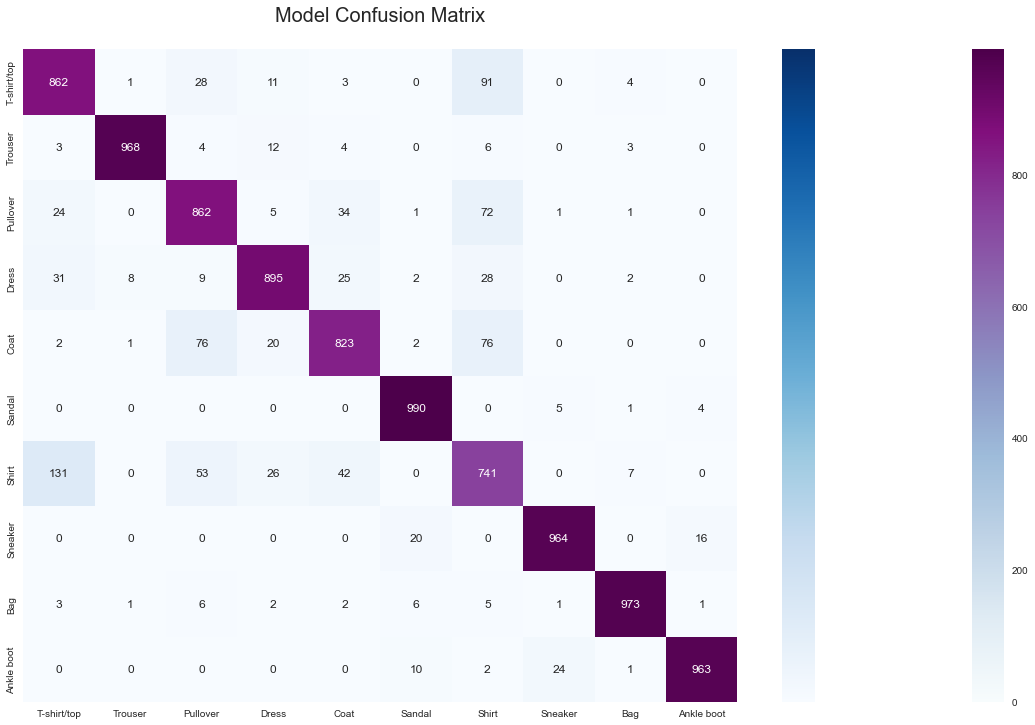

In [140]:
cf_matrix = confusion_matrix(y_test, predictions)

vmin = np.min(cf_matrix)
vmax = np.max(cf_matrix)
off_diag_mask = np.eye(*cf_matrix.shape, dtype=bool)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(20, 12))
plt.title("Model Confusion Matrix\n", fontsize =20)
sns.heatmap(cf_matrix, annot=True, mask=~off_diag_mask, cmap='BuPu', fmt="", vmin=vmin, vmax=vmax)
sns.heatmap(cf_matrix, 
            annot=True, 
            mask=off_diag_mask, 
            cmap="Blues", 
            vmin=vmin, 
            vmax=vmax, cbar_kws=dict(ticks=[]), 
            fmt="", 
            xticklabels=classes, 
            yticklabels=classes);

In [81]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [82]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8161145448684692
Test accuracy: 0.9041000008583069


# Prediction

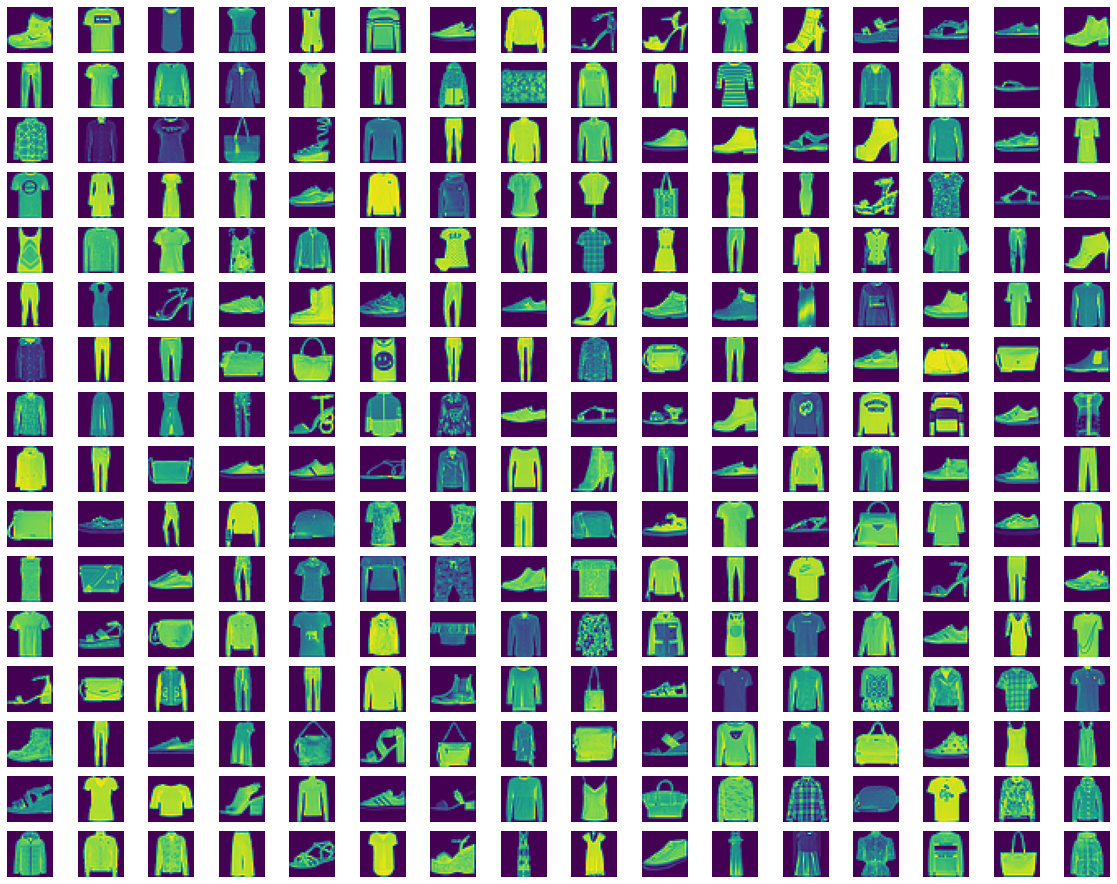

In [76]:
plt.figure(figsize= (20, 16))

for i in range(256):
  plt.subplot(16, 16, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

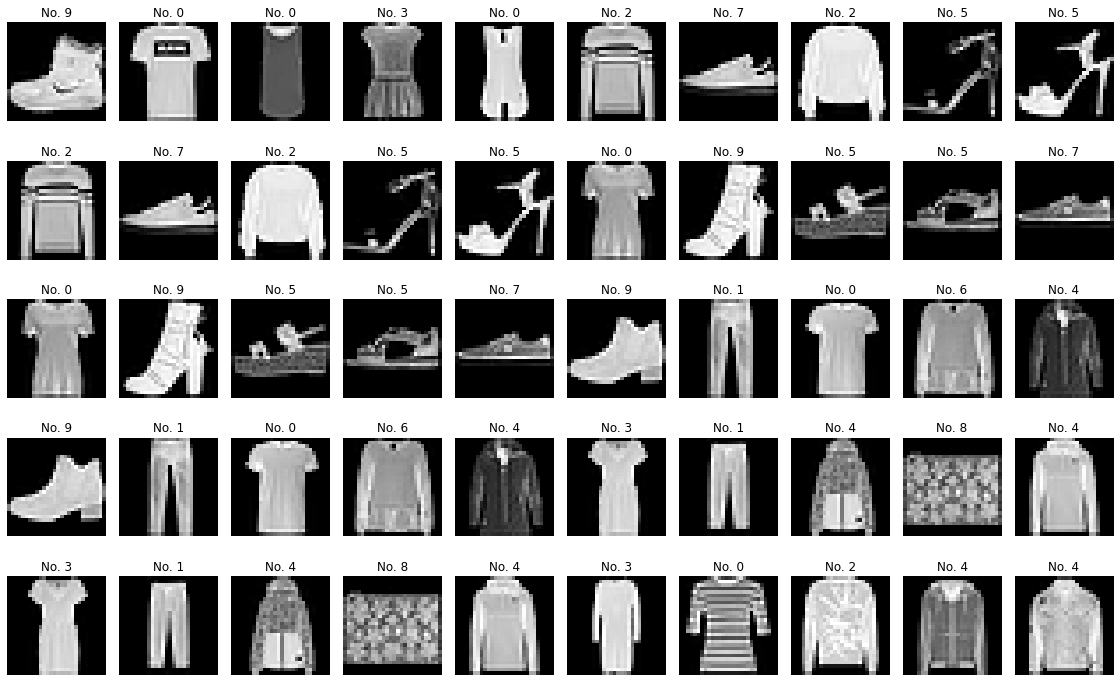

In [77]:
num_rows, num_cols = 5, 10

f, ax = plt.subplots(5, 10, figsize=(20, 12),
                     gridspec_kw={'wspace':0.03, 'hspace':0.4}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [87]:
my_number = X_train[8]
my_number

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

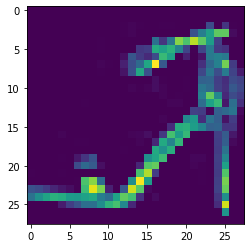

In [88]:
plt.imshow(my_number.reshape(28, 28));

In [89]:
model.predict(my_number.reshape(1, 28, 28, 1))

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [90]:
# SHAPE --> (num_images, width, height, color_channels)

np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=1)

array([5], dtype=int64)

In [91]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [92]:
classes[5]

'Sandal'

# Saving Model

In [84]:
# model.save("assng_dl_2kaggle.h5")